In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error

In [3]:
#DATA EXPLORATION
# Load the dataset
data = pd.read_csv('StudentPerformanceFactors.csv')
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [4]:
#Displays the first few data of the dataset
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
#Displays the last few data of the dataset
data.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [6]:
# Check basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [7]:
# Check basic statistical description
data.describe(include='all')

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6607.000000,6607.000000,6607,6607,6607,6607.00000,6607.000000,6607,6607,6607.000000,6607,6529,6607,6607,6607.000000,6607,6517,6540,6607,6607.000000
unique,NaN,NaN,3,3,2,NaN,NaN,3,2,NaN,3,3,2,3,NaN,2,3,3,2,NaN
top,NaN,NaN,Medium,Medium,Yes,NaN,NaN,Medium,Yes,NaN,Low,Medium,Public,Positive,NaN,No,High School,Near,Male,NaN
freq,NaN,NaN,3362,3319,3938,NaN,NaN,3351,6108,NaN,2672,3925,4598,2638,NaN,5912,3223,3884,3814,NaN
mean,19.975329,79.977448,NaN,NaN,NaN,7.02906,75.070531,NaN,NaN,1.493719,NaN,NaN,NaN,NaN,2.967610,NaN,NaN,NaN,NaN,67.235659
std,5.990594,11.547475,NaN,NaN,NaN,1.46812,14.399784,NaN,NaN,1.230570,NaN,NaN,NaN,NaN,1.031231,NaN,NaN,NaN,NaN,3.890456
min,1.000000,60.000000,NaN,NaN,NaN,4.00000,50.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,55.000000
25%,16.000000,70.000000,NaN,NaN,NaN,6.00000,63.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,65.000000
50%,20.000000,80.000000,NaN,NaN,NaN,7.00000,75.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,67.000000
75%,24.000000,90.000000,NaN,NaN,NaN,8.00000,88.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,69.000000


In [8]:
# type of the data
type(data)

pandas.core.frame.DataFrame

In [9]:
# dataset columns
data.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [10]:
# number of rows
len(data.axes[0])

6607

In [11]:
# number of variables
len(data.axes[1])

20

In [12]:
# Total count of each column
data.count()

Hours_Studied                 6607
Attendance                    6607
Parental_Involvement          6607
Access_to_Resources           6607
Extracurricular_Activities    6607
Sleep_Hours                   6607
Previous_Scores               6607
Motivation_Level              6607
Internet_Access               6607
Tutoring_Sessions             6607
Family_Income                 6607
Teacher_Quality               6529
School_Type                   6607
Peer_Influence                6607
Physical_Activity             6607
Learning_Disabilities         6607
Parental_Education_Level      6517
Distance_from_Home            6540
Gender                        6607
Exam_Score                    6607
dtype: int64

In [13]:
#DATA PREPROCESSING
# Check for missing values
print(data.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [14]:
data.dropna(subset=['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'], inplace=True)
data.count()

Hours_Studied                 6378
Attendance                    6378
Parental_Involvement          6378
Access_to_Resources           6378
Extracurricular_Activities    6378
Sleep_Hours                   6378
Previous_Scores               6378
Motivation_Level              6378
Internet_Access               6378
Tutoring_Sessions             6378
Family_Income                 6378
Teacher_Quality               6378
School_Type                   6378
Peer_Influence                6378
Physical_Activity             6378
Learning_Disabilities         6378
Parental_Education_Level      6378
Distance_from_Home            6378
Gender                        6378
Exam_Score                    6378
dtype: int64

In [15]:
data.duplicated().sum()

0

In [16]:
# Create a LabelEncoder object
le = LabelEncoder()
# Apply Label Encoding to categorical columns
data['Gender'] = le.fit_transform(data['Gender'])
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,1,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,0,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,1,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,1,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,0,70


In [17]:
print(data.columns.tolist())

['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']


In [18]:
print(data[['Exam_Score', 'Hours_Studied']].dtypes)

Exam_Score       int64
Hours_Studied    int64
dtype: object


In [19]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data[numeric_columns])
normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns)
normalized_df.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,0.505079,0.344520,-0.023819,-0.143491,-1.211858,0.026516,-0.064416
1,-0.163260,-1.387109,0.657418,-1.115763,0.409036,0.998480,-1.597410
2,0.672163,1.556661,-0.023819,1.106573,0.409036,0.998480,1.724077
3,1.507587,0.777428,0.657418,1.592709,-0.401411,0.998480,0.957580
4,-0.163260,1.037172,-0.705056,-0.699075,1.219483,0.998480,0.702081


In [20]:
data['Parental_Education_Level'].unique()

array(['High School', 'College', 'Postgraduate'], dtype=object)

In [21]:
motivation_summary = data['Motivation_Level'].value_counts()
print(motivation_summary)

Motivation_Level
Medium    3237
Low       1864
High      1277
Name: count, dtype: int64


In [22]:
top_10_scores = data.nlargest(10, 'Exam_Score')
print(top_10_scores['Exam_Score']) 

1525    101
94      100
2425     99
3579     99
4192     98
6347     98
6393     98
529      97
919      97
5966     97
Name: Exam_Score, dtype: int64


In [29]:
data['Student_ID'] = data.index
top_10_scores = data.nlargest(10, 'Exam_Score')
print(top_10_scores[['Student_ID', 'Exam_Score']].to_string(index=False))

 Student_ID  Exam_Score
       1525         101
         94         100
       2425          99
       3579          99
       4192          98
       6347          98
       6393          98
        529          97
        919          97
       5966          97


In [ ]:
# Analyze students with Sleep Hours < 6 OR Performance Score < 50
filtered_data_or = data[(data['Previous_Scores'] > 80) | (data['Exam_Score'] < 30)][['Previous_Scores','Exam_Score']]
print(filtered_data_or)
print(f"Number of students whose previous score greater than 80 or score below 30: {len(filtered_data_or)}")

In [ ]:
# Analyze students with Sleep Hours > 7 AND Exam Score > 75
filtered_data_and = data[(data['Sleep_Hours'] > 8) & (data['Exam_Score'] > 75)][['Sleep_Hours', 'Exam_Score']]
print(filtered_data_and)
print(f"Number of students who sleep more than 7 hours and score above 75: {len(filtered_data_and)}")

In [ ]:
# Visualize the outliers with boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.xticks(rotation=70)
plt.title('Boxplot to Visualize Outliers')
plt.show()

In [ ]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers for each column using .apply
outliers = numeric_data.apply(lambda x: (x < lower_bound[x.name]) | (x > upper_bound[x.name]), axis=0)
print(outliers.sum())

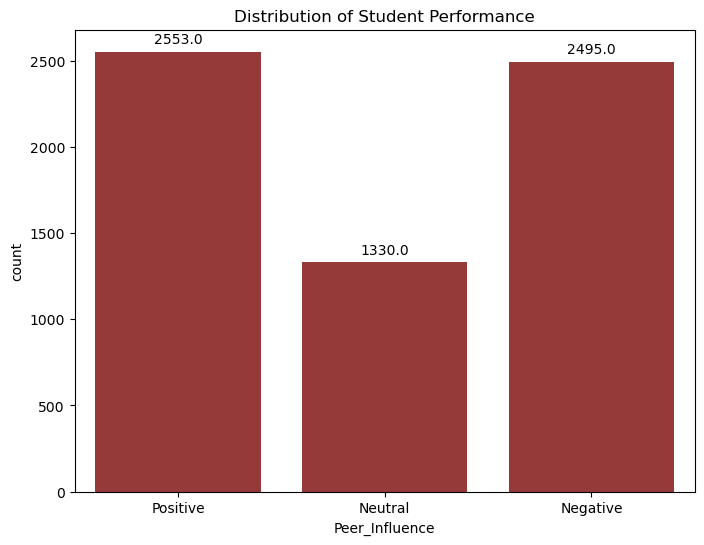

In [27]:
plt.figure(figsize=(8, 6)) 
# Create the countplot
a = sns.countplot(x='Peer_Influence', data=data, color="brown")
# Manually add bar labels
for p in a.patches:
    a.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9),
               textcoords = 'offset points')
a.set_xticks([0, 1, 2])  
a.set_xticklabels(['Positive', 'Neutral', 'Negative'])
plt.title('Distribution of Student Performance')
plt.show()

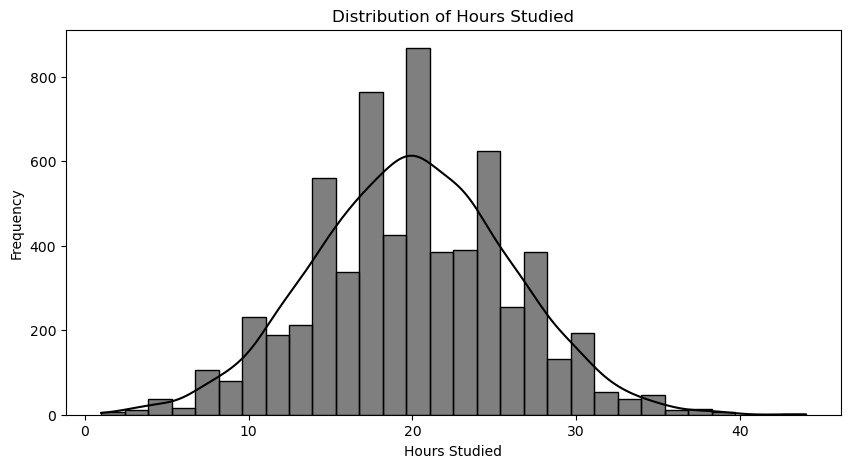

In [28]:
#distribution of hours studied
plt.figure(figsize=(10, 5))
sns.histplot(data['Hours_Studied'], bins=30, kde=True,color="Black")
plt.title('Distribution of Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Frequency')
plt.show()

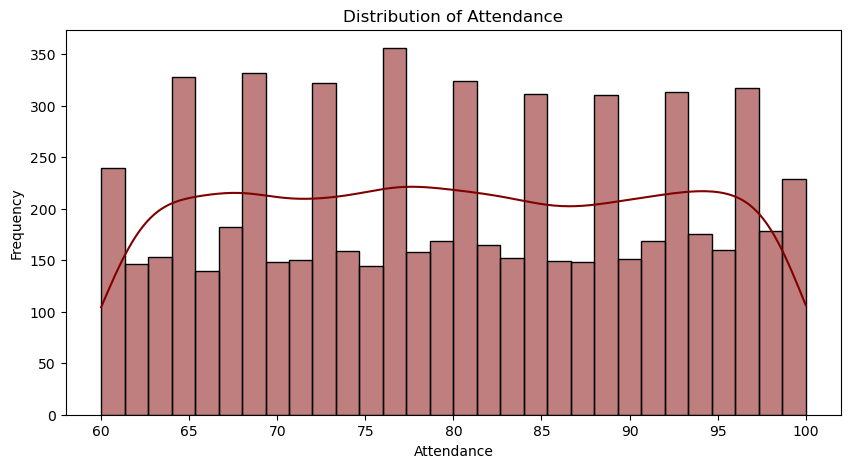

In [29]:
#distribution of attendance
plt.figure(figsize=(10, 5))
sns.histplot(data['Attendance'], bins=30, kde=True,color="maroon")
plt.title('Distribution of Attendance')
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.show()

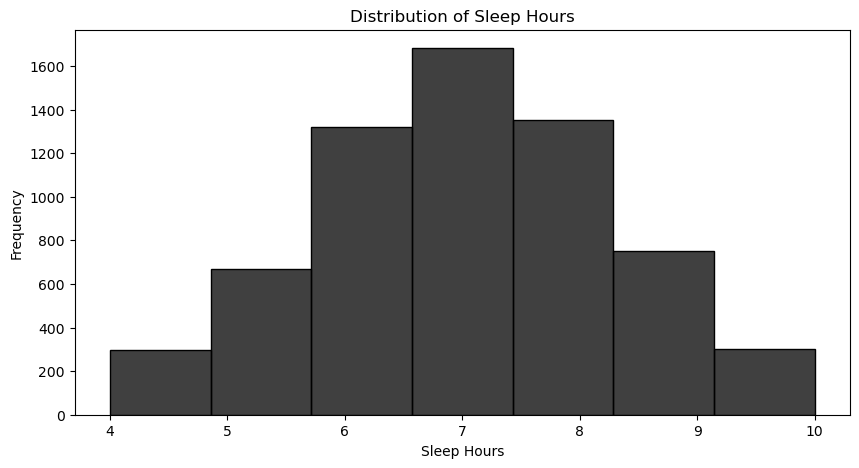

In [30]:
#distribution of sleep hours
plt.figure(figsize=(10, 5))
sns.histplot(data['Sleep_Hours'], bins=7,color="Black")
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.show()

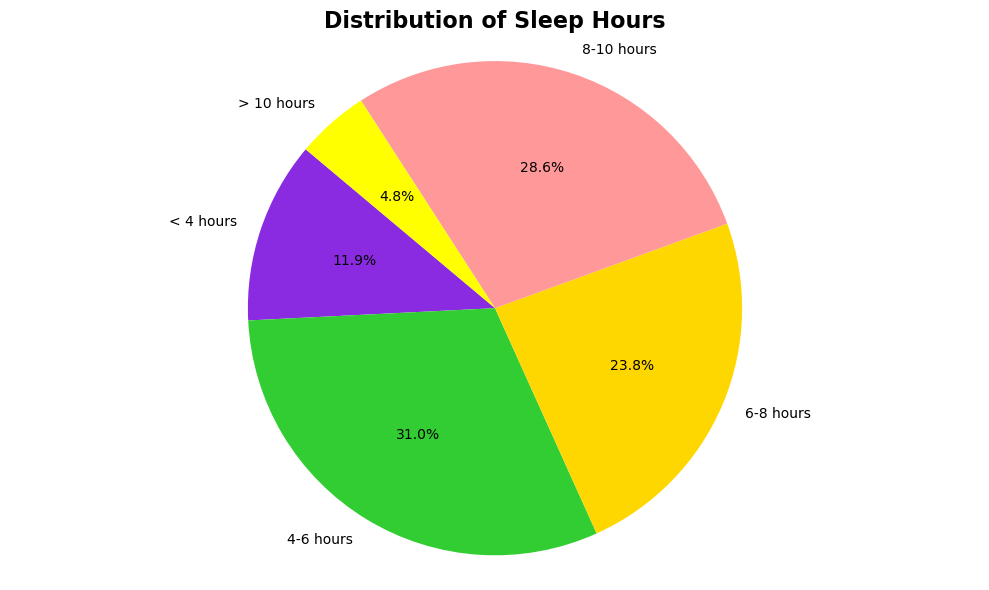

In [31]:
labels = ['< 4 hours', '4-6 hours', '6-8 hours', '8-10 hours', '> 10 hours']
counts = [5, 13, 10, 12, 2]  # Corresponding counts for each category
plt.figure(figsize=(10, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, 
        colors=['#8A2BE2','#32CD32','#FFD700','#FF9999','yellow'])
plt.title('Distribution of Sleep Hours', fontsize=16, fontweight='bold')
plt.axis('equal') 
plt.tight_layout()
plt.show()

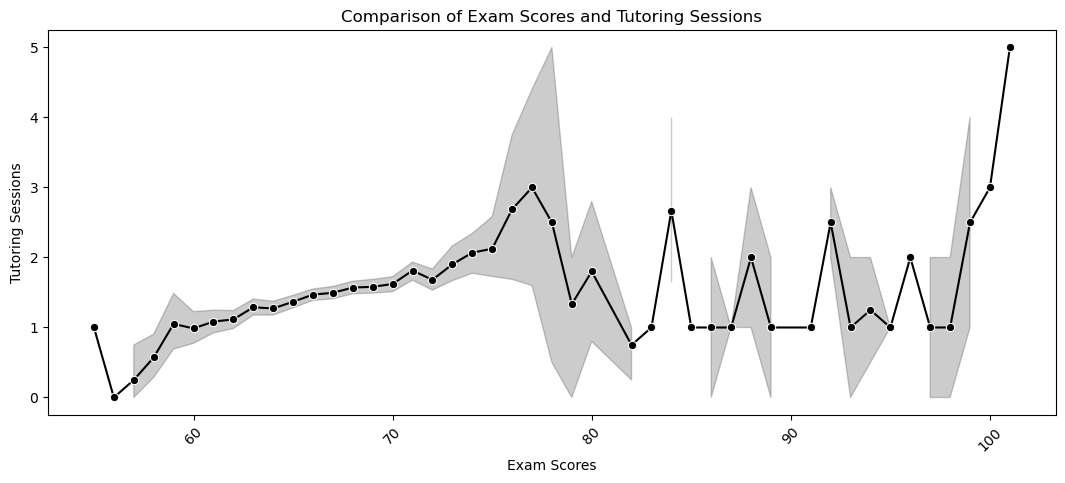

In [32]:
# Comparison of hours studied and exam scores using a lineplot
plt.figure(figsize=(13, 5))
sns.lineplot(x='Exam_Score', y='Tutoring_Sessions', data=data, marker="o",color="black")
plt.title('Comparison of Exam Scores and Tutoring Sessions')
plt.xlabel('Exam Scores')  
plt.ylabel('Tutoring Sessions') 
plt.xticks(rotation=45) 
plt.show()

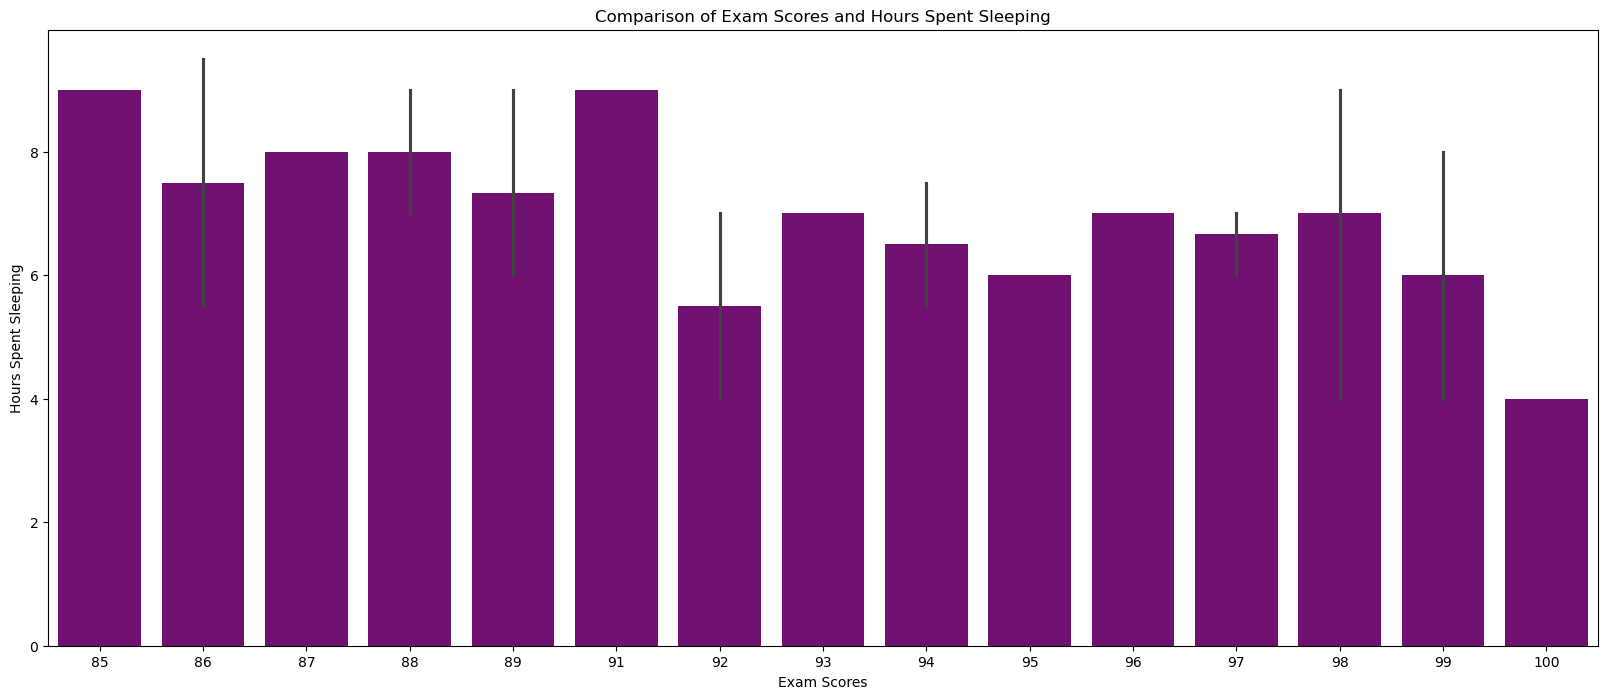

In [33]:
exam_score_range = (85, 100) 
sleep_hours_range = (0, 10) 
filtered_data = data[
    (data['Exam_Score'] >= exam_score_range[0]) & (data['Exam_Score'] <= exam_score_range[1]) &
    (data['Sleep_Hours'] >= sleep_hours_range[0]) & (data['Sleep_Hours'] <= sleep_hours_range[1])
]
plt.figure(figsize=(20, 8))
sns.barplot(x='Exam_Score', y='Sleep_Hours', data=filtered_data, color="purple")
plt.title('Comparison of Exam Scores and Hours Spent Sleeping')
plt.xlabel('Exam Scores')
plt.ylabel('Hours Spent Sleeping')
plt.show()

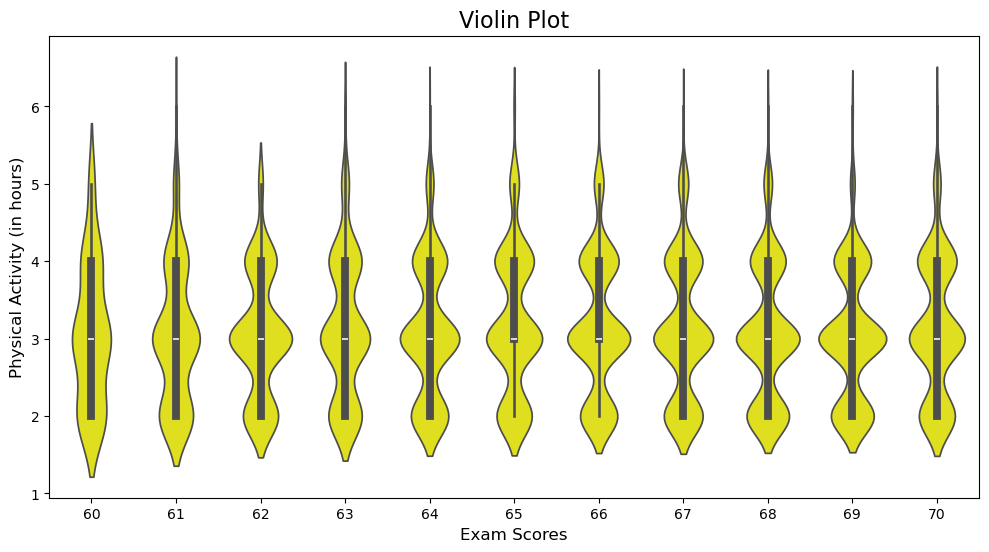

In [34]:
exam_score_range = (60, 70) 
physical_activity_range = (2, 6)  
filtered_data = data[
    (data['Exam_Score'] >= exam_score_range[0]) & (data['Exam_Score'] <= exam_score_range[1]) &
    (data['Physical_Activity'] >= physical_activity_range[0]) & (data['Physical_Activity'] <= physical_activity_range[1])]
# Create a violin plot to compare physical activity and exam scores within the range
plt.figure(figsize=(12, 6))
sns.violinplot(x='Exam_Score', y='Physical_Activity', data=filtered_data,color='yellow')
plt.title('Violin Plot', fontsize=16)
plt.xlabel('Exam Scores', fontsize=12)
plt.ylabel('Physical Activity (in hours)', fontsize=12)
plt.show()

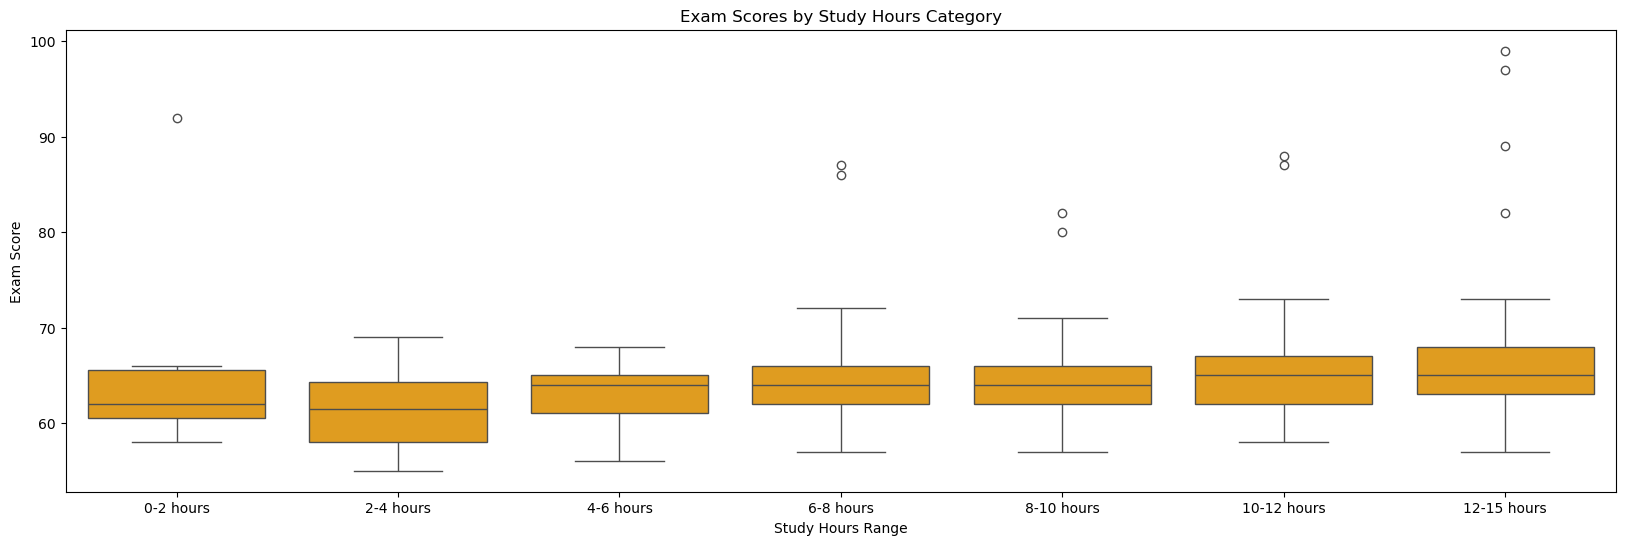

In [35]:
bins = [0, 2, 4, 6, 8, 10, 12, 15]
labels = ['0-2 hours', '2-4 hours', '4-6 hours', '6-8 hours', '8-10 hours', '10-12 hours', '12-15 hours']
data['Hours_Category'] = pd.cut(data['Hours_Studied'], bins=bins, labels=labels, include_lowest=True)
plt.figure(figsize=(20, 6)) 
sns.boxplot(x='Hours_Category', y='Exam_Score', data=data,color="orange")
plt.title('Exam Scores by Study Hours Category')
plt.xlabel('Study Hours Range')
plt.ylabel('Exam Score')
plt.show()

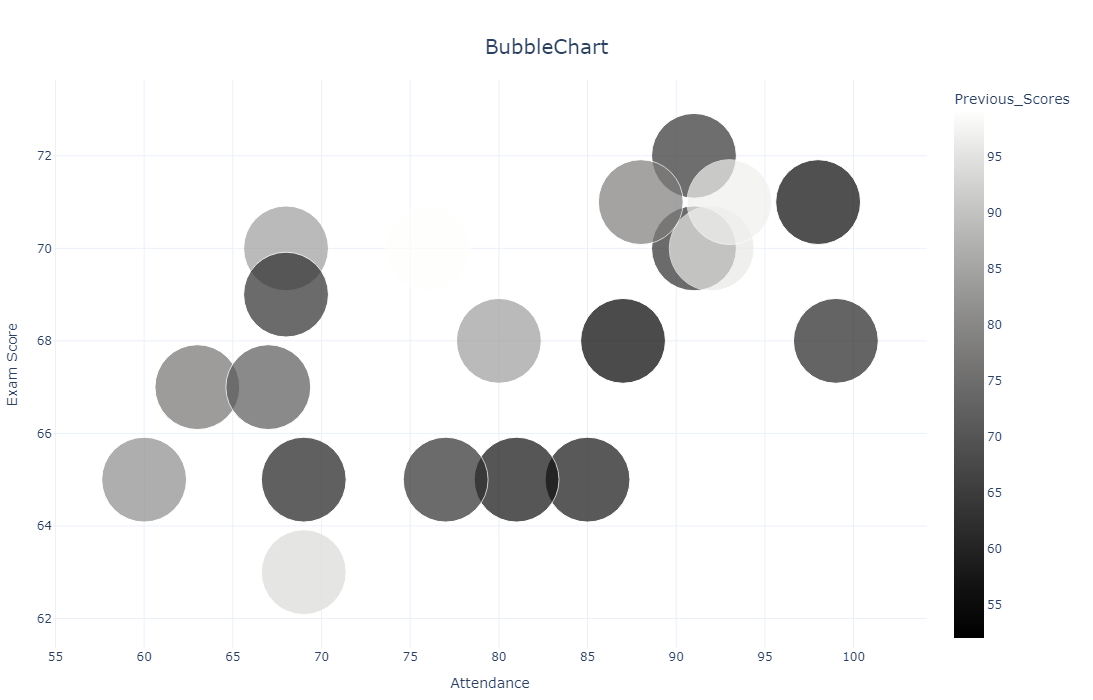

In [45]:
import matplotlib.pyplot as plt
import plotly.express as px
df_sorted = data.sort_values(by='Sleep_Hours', ascending=False).head(20)
fig = px.scatter(df_sorted, 
    x='Attendance',                   
    y='Exam_Score',                  
    size='Sleep_Hours',    
    color='Previous_Scores',       
    hover_data=['Attendance', 'Exam_Score', 'Sleep_Hours', 'Previous_Scores'],  
    title='BubbleChart',
    size_max=60,            
    color_continuous_scale='gray')
fig.update_layout(
    xaxis_title='Attendance',
    yaxis_title='Exam Score',
     title=dict(
        text='BubbleChart',
        font=dict(size=20),     
        x=0.5,                     
        xanchor='center',      
        yanchor='top'),
    width=900, height=700,      
    margin=dict(l=40, r=40, t=80, b=40), 
    template='plotly_white')
fig.show()

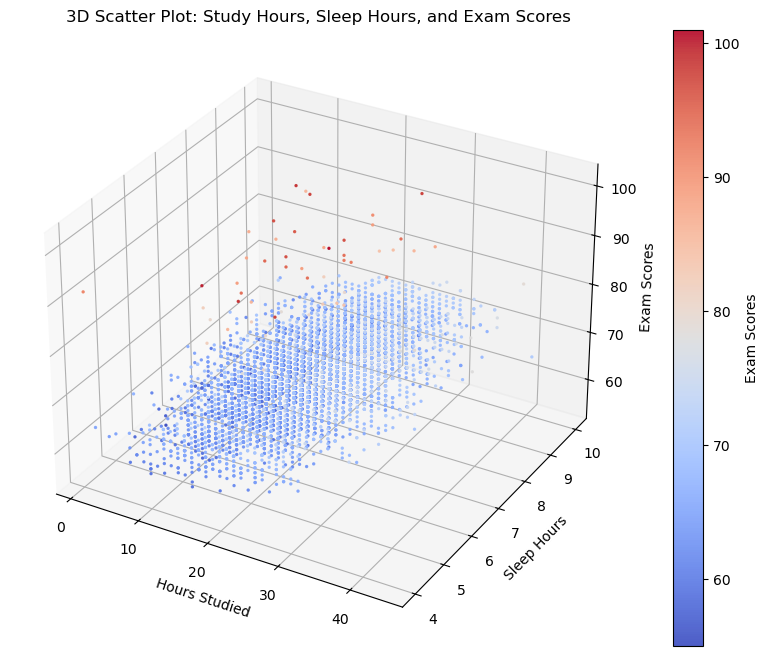

In [37]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter plot
sc = ax.scatter(
    data['Hours_Studied'],  # x-axis
    data['Sleep_Hours'],    # y-axis
    data['Exam_Score'],     # z-axis
    c=data['Exam_Score'],   # color based on exam score
    cmap='coolwarm',        # color map
    s=2,                   # size of the points
    alpha=0.9           # transparency
)

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_label('Exam Scores')

# Add labels
ax.set_title('3D Scatter Plot: Study Hours, Sleep Hours, and Exam Scores')
ax.set_xlabel('Hours Studied')
ax.set_ylabel('Sleep Hours')
ax.set_zlabel('Exam Scores')

# Show the plot
plt.show()

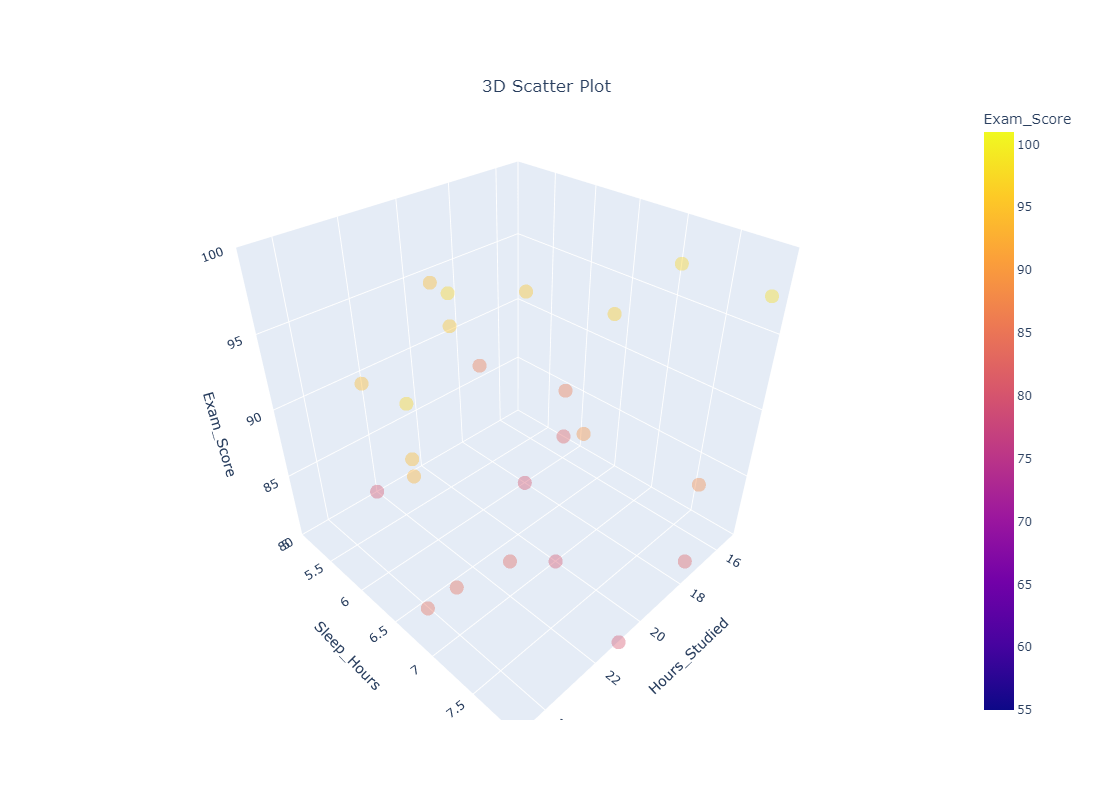

<Figure size 3000x2600 with 0 Axes>

In [38]:
plt.figure(figsize=(30, 26))
fig = px.scatter_3d(data, x='Hours_Studied', y='Sleep_Hours', z='Exam_Score', color='Exam_Score',
                    title='3D Scatter Plot')
x_min_value = 15  
x_max_value = 25  
y_min_value = 5 
y_max_value = 8  
z_min_value = 80 
z_max_value = 100 
fig.update_layout(
    title=dict(x=0.5, y=0.9),
    scene=dict(
        xaxis=dict(range=[x_min_value, x_max_value]),
        yaxis=dict(range=[y_min_value, y_max_value]),
        zaxis=dict(range=[z_min_value, z_max_value]),),
    autosize=False,
    width=800,  
    height=800, )
trace = dict(
    type='scatter3d',
    colorbar=dict(lenmode='fraction', len=0.2, thickness=15))
fig.update_traces(marker=dict(opacity=0.4))
fig.show()

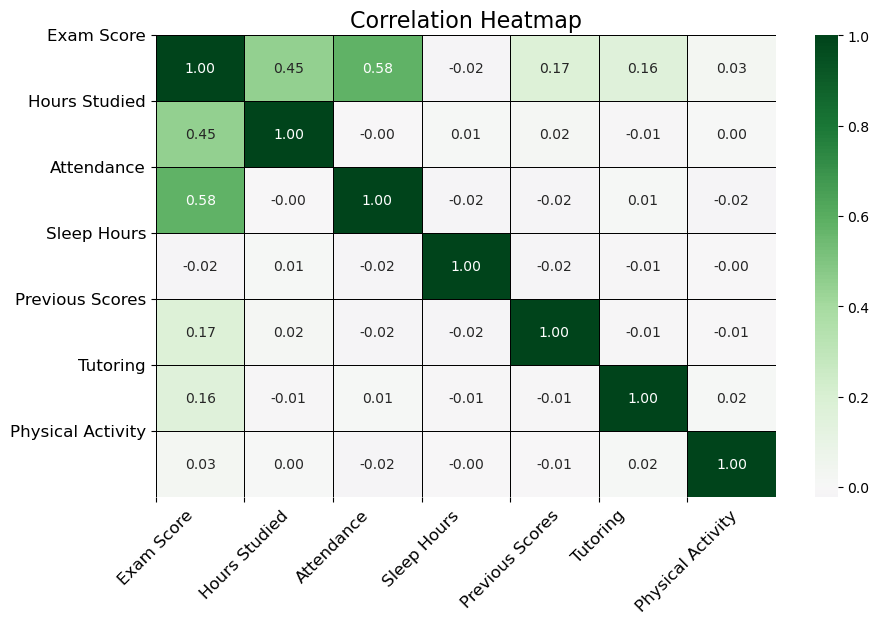

In [39]:
corr = data[['Exam_Score', 'Hours_Studied', 'Attendance', 'Sleep_Hours', 
              'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='PRGn', center=0, cbar=True,
            linewidths=0.5, linecolor='black', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
tick_labels = ['Exam Score', 'Hours Studied', 'Attendance', 'Sleep Hours', 
               'Previous Scores', 'Tutoring', 'Physical Activity']
ticks = range(len(tick_labels))
plt.xticks(ticks=ticks, labels=tick_labels, rotation=45, fontsize=12)
plt.yticks(ticks=ticks, labels=tick_labels, fontsize=12)
plt.show()

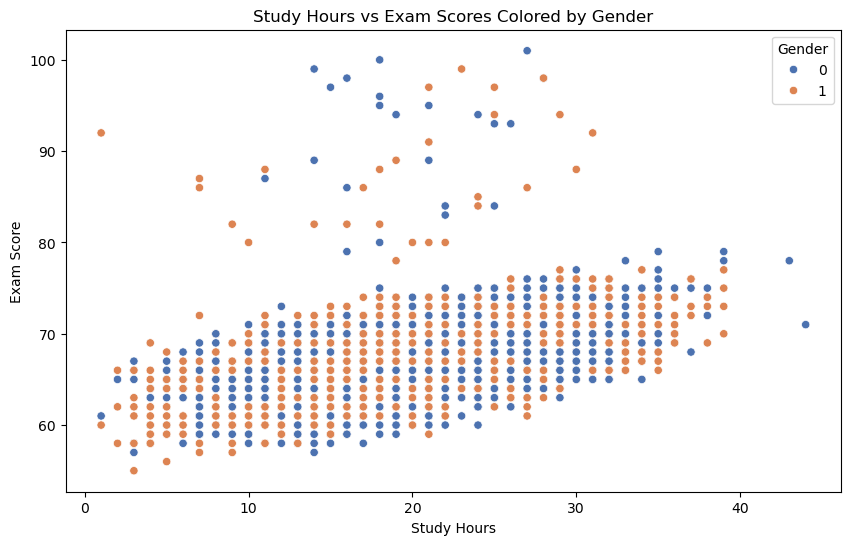

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', hue='Gender', data=data, palette='deep')
plt.title('Study Hours vs Exam Scores Colored by Gender')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.legend(title='Gender')
plt.show()

In [41]:
from sklearn.preprocessing import LabelEncoder
# List of categorical columns to encode
categorical_columns = [
    'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 
    'School_Type', 'Peer_Influence', 'Learning_Disabilities', 
    'Parental_Education_Level', 'Distance_from_Home', 'Gender'
]
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])
print(data.dtypes)
data.head()

Hours_Studied                    int64
Attendance                       int64
Parental_Involvement             int32
Access_to_Resources              int32
Extracurricular_Activities       int32
Sleep_Hours                      int64
Previous_Scores                  int64
Motivation_Level                 int32
Internet_Access                  int32
Tutoring_Sessions                int64
Family_Income                    int32
Teacher_Quality                  int32
School_Type                      int32
Peer_Influence                   int32
Physical_Activity                int64
Learning_Disabilities            int32
Parental_Education_Level         int32
Distance_from_Home               int32
Gender                           int64
Exam_Score                       int64
Hours_Category                category
dtype: object


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Hours_Category
0,23,84,1,0,0,7,73,1,1,0,...,2,1,2,3,0,1,2,1,67,NaN
1,19,64,1,2,0,8,59,1,1,2,...,2,1,0,4,0,0,1,0,61,NaN
2,24,98,2,2,1,7,91,2,1,2,...,2,1,1,4,0,2,2,1,74,NaN
3,29,89,1,2,1,8,98,2,1,1,...,2,1,0,4,0,1,1,1,71,NaN
4,19,92,2,2,1,6,65,2,1,3,...,0,1,1,4,0,0,2,0,70,NaN


In [42]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
# Categorical columns to encode
categorical_columns = [
    'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 
    'School_Type', 'Peer_Influence', 'Learning_Disabilities', 
    'Parental_Education_Level', 'Distance_from_Home', 'Gender']
# Initialize LabelEncoder
le = LabelEncoder()
# Encode categorical columns
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])
# Define features (X) and target (y)
X = data[['Hours_Studied','Attendance','Parental_Involvement','Access_to_Resources',
          'Extracurricular_Activities','Sleep_Hours','Previous_Scores','Motivation_Level',
          'Internet_Access','Tutoring_Sessions','Family_Income','Teacher_Quality','School_Type',
          'Peer_Influence','Physical_Activity','Learning_Disabilities','Parental_Education_Level',
          'Distance_from_Home','Gender']]  # Ensure all are numeric
y = data['Exam_Score']
# Check for any remaining non-numeric columns
non_numeric = X.select_dtypes(include=['object']).columns
if len(non_numeric) > 0:
    print(f"Non-numeric columns: {non_numeric}")
    for col in non_numeric:
        X[col] = le.fit_transform(X[col])
# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate model performance
accuracy = r2_score(y_test, y_pred)
print(f'Model accuracy : {accuracy:.2f}')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Model accuracy : 0.67
Mean Squared Error: 5.08
